In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
import warnings

In [47]:
warnings.filterwarnings('ignore')

In [48]:
# load data
df = pd.read_csv('country_data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [49]:
# check for null values
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

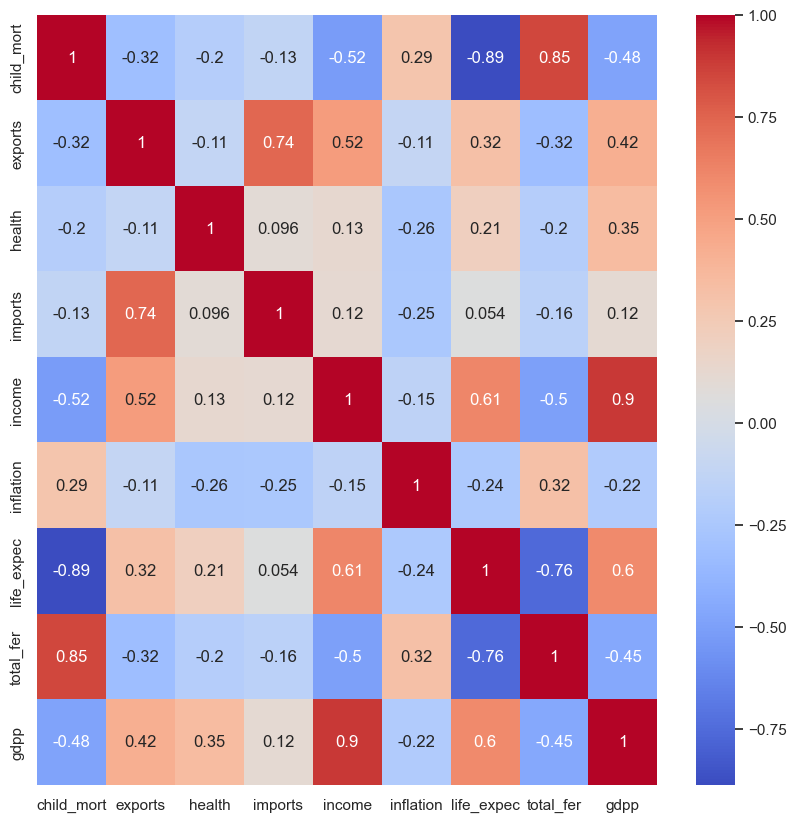

In [50]:
# drop country column
no_country = df.drop(['country'], axis=1)
# heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(no_country.corr(), annot=True, cmap='coolwarm')
plt.show()

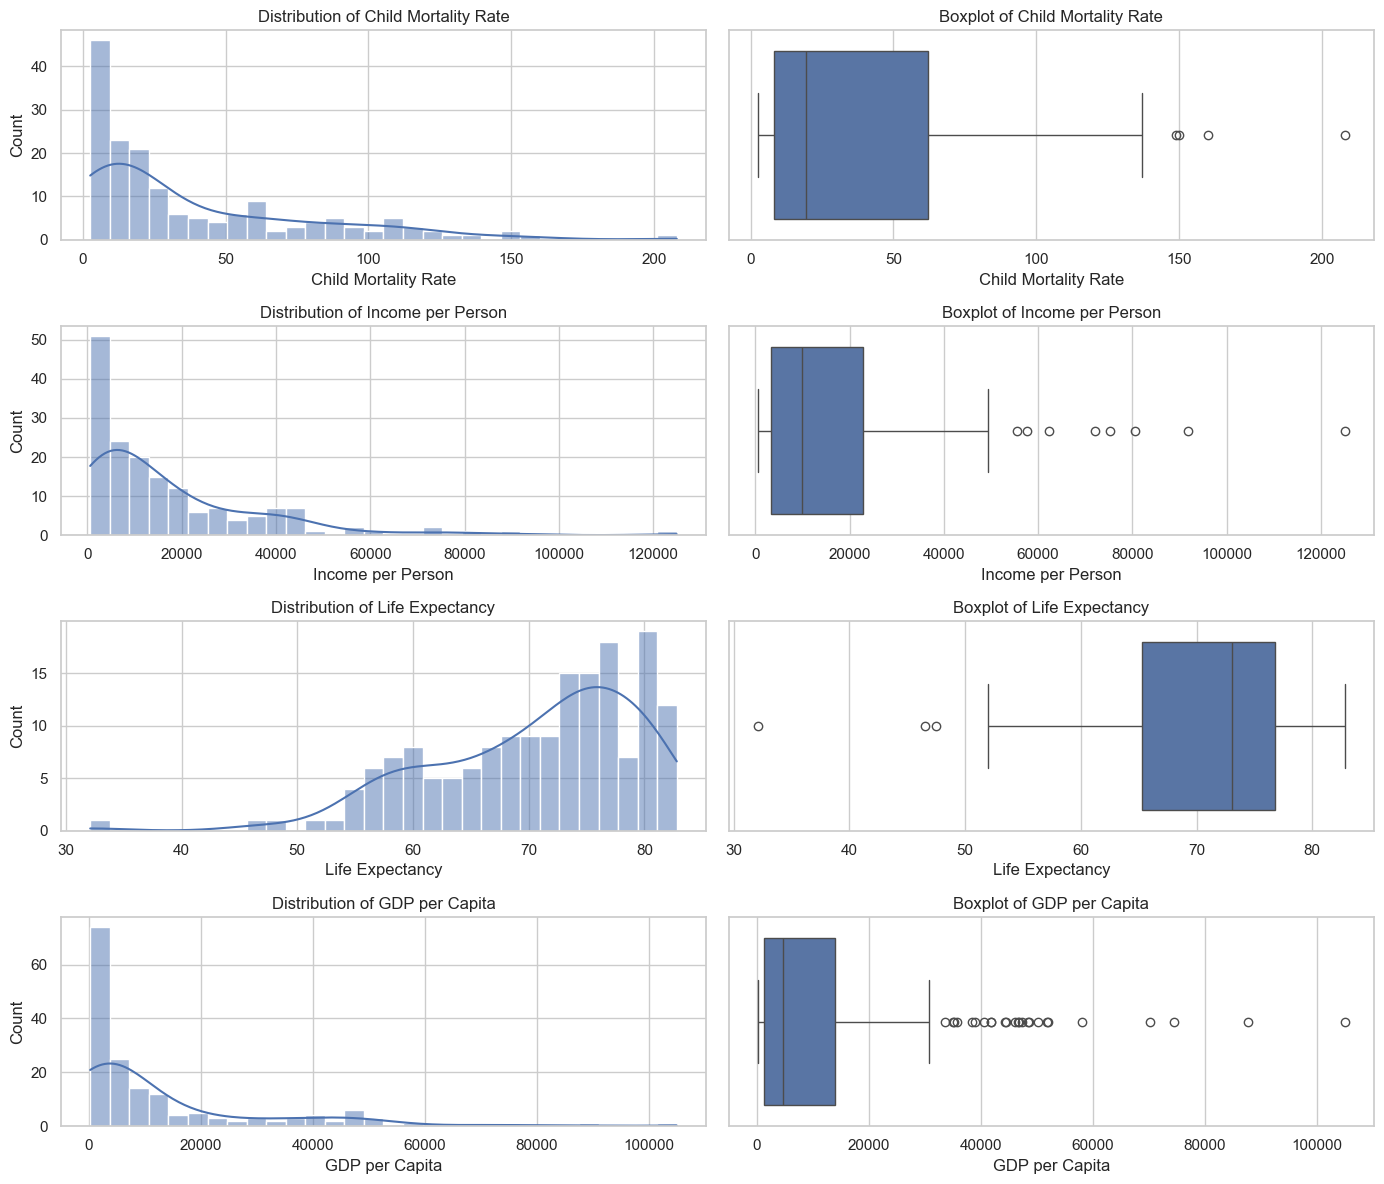

In [51]:
# set style and choose columns to visualize
sns.set(style="whitegrid")
columns_to_visualize = ['child_mort', 'income', 'life_expec', 'gdpp']

# set titles
titles = ['Child Mortality Rate', 'Income per Person', 'Life Expectancy', 'GDP per Capita']

# create subplots
fig, axes = plt.subplots(nrows=len(columns_to_visualize), ncols=2, figsize=(14, 12))

# create visualizations
for i, column in enumerate(columns_to_visualize):
    # histogram
    sns.histplot(df[column], bins=30, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {titles[i]}')
    axes[i, 0].set_xlabel(titles[i])
    
    # boxplot
    sns.boxplot(x=df[column], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {titles[i]}')
    axes[i, 1].set_xlabel(titles[i])

# display plots
plt.tight_layout()
plt.show()


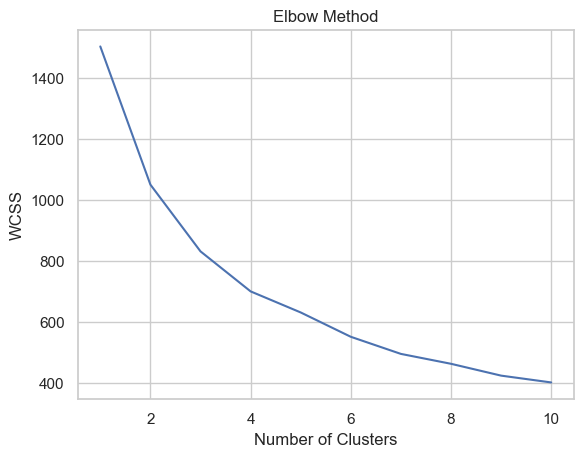

In [52]:
# scale data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(no_country)
# use elbow method to determine best k value
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [53]:
# k-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

# add cluster labels to the original data
df['cluster'] = cluster_labels + 1
no_country['cluster'] = cluster_labels + 1

# display data with cluster labels
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,3
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3


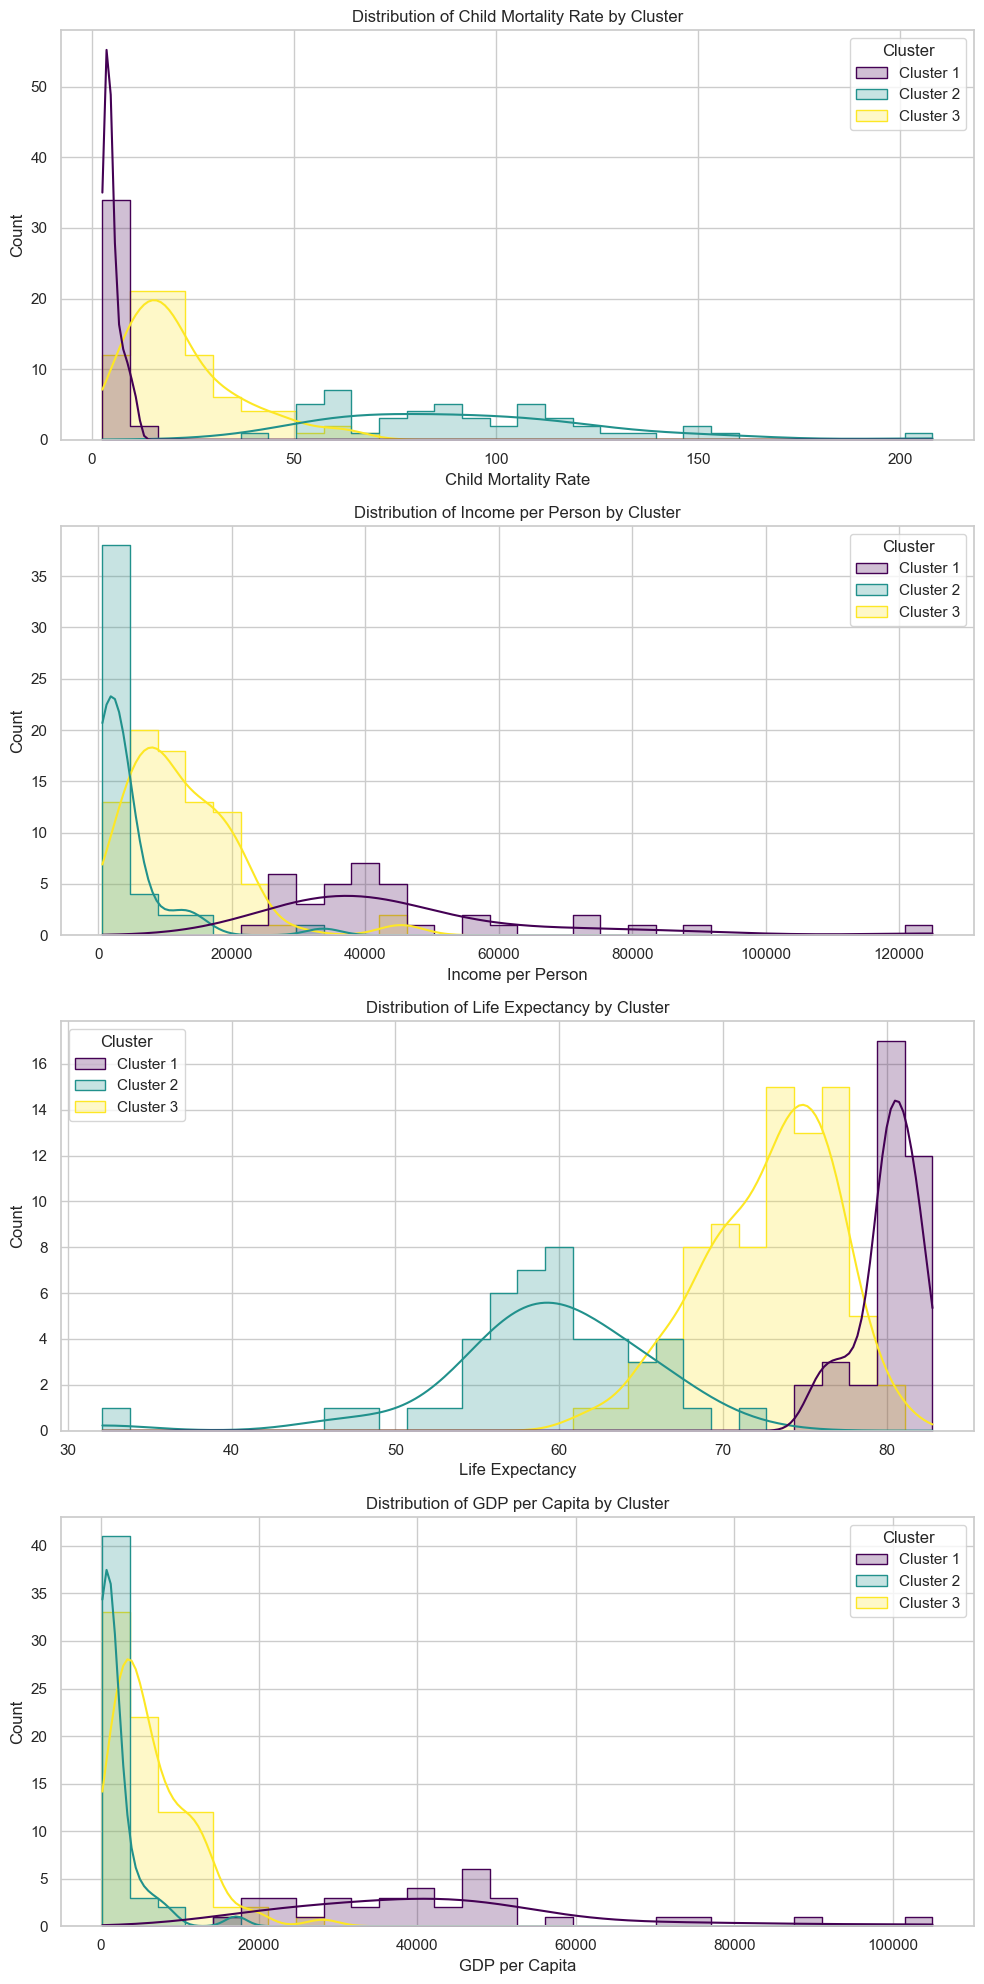

In [54]:
# create subplots for histograms with clusters
fig, axes = plt.subplots(nrows=len(columns_to_visualize), ncols=1, figsize=(10, 20))
# labels for the legend
cluster_labels = {1: 'Cluster 1', 2: 'Cluster 2', 3: 'Cluster 3'}
# create visualizations
for i, column in enumerate(columns_to_visualize):
    sns.histplot(data=df, x=column, hue='cluster', bins=30, kde=True, ax=axes[i], 
                 palette="viridis", element="step", legend=True)
    axes[i].set_title(f'Distribution of {titles[i]} by Cluster')
    axes[i].set_xlabel(titles[i])
    axes[i].get_legend().set_title('Cluster')
    for t, l in zip(axes[i].get_legend().texts, cluster_labels.values()):
        t.set_text(l)

# display plots
plt.tight_layout()
plt.show()

In [55]:
# mean values for each cluster
no_country.groupby('cluster').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster,,,,,,,,,
1,5.000000,58.738889,8.807778,51.491667,45672.222222,2.671250,80.127778,1.752778,42494.444444
2,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979
3,21.927381,40.243917,6.200952,47.473404,12305.595238,7.600905,72.814286,2.307500,6486.452381


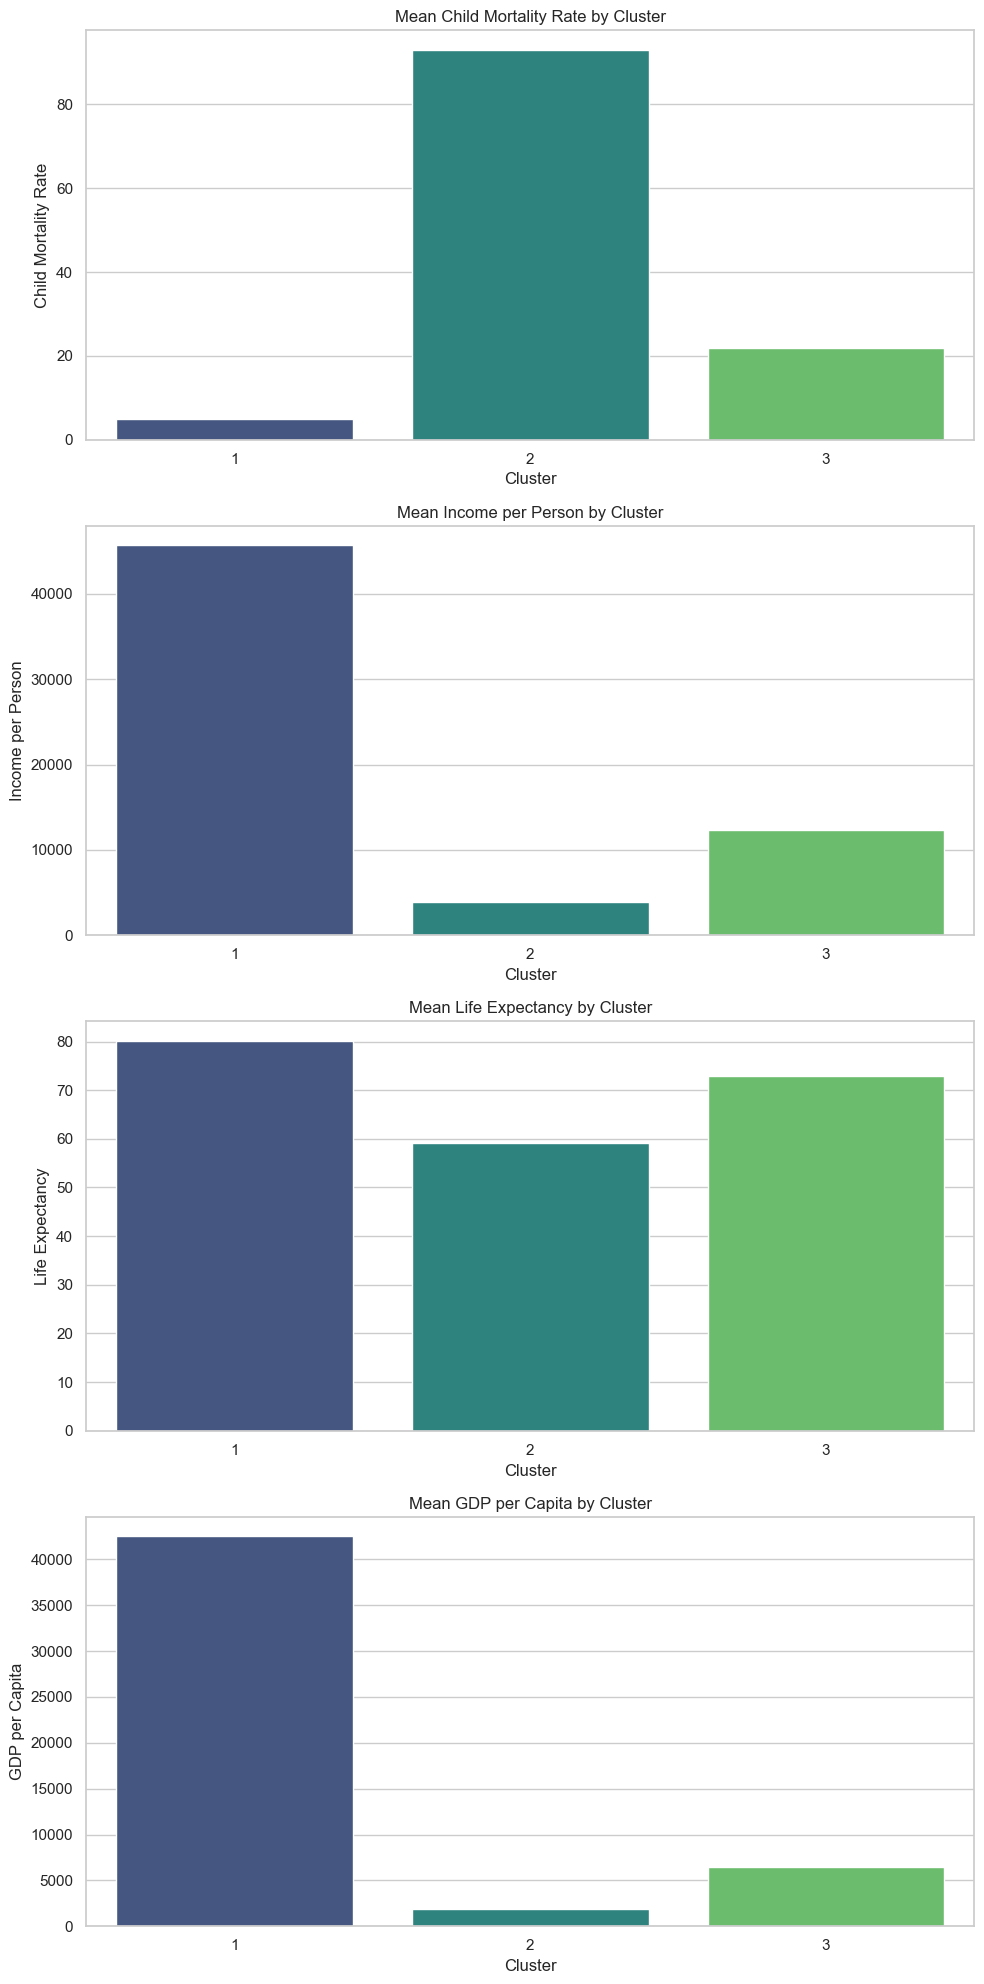

In [56]:
# create bar charts subplots comparing clusters
fig, axes = plt.subplots(nrows=len(columns_to_visualize), ncols=1, figsize=(10, 20))

# loop through the columns to create bar charts
for i, column in enumerate(columns_to_visualize):
    sns.barplot(x='cluster', y=column, data=df, ax=axes[i], palette="viridis", ci=None)
    axes[i].set_title(f'Mean {titles[i]} by Cluster')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(titles[i])

# display plots
plt.tight_layout()
plt.show()

In [57]:
# summary: 
# Group 1 has the highest income, life expectancy, and GDP per capita with low child mortality rates -  LOW POTENTIAL NEED FOR AID
# Group 2 has the lowest income, life expectancy, and GDP per capita with high child mortality rates - HIGH POTENTIAL NEED FOR AID
# Group 3 has medium income, life expectancy, and GDP per capita with medium child mortality rates - MEDIUM POTENTIAL NEED FOR AID

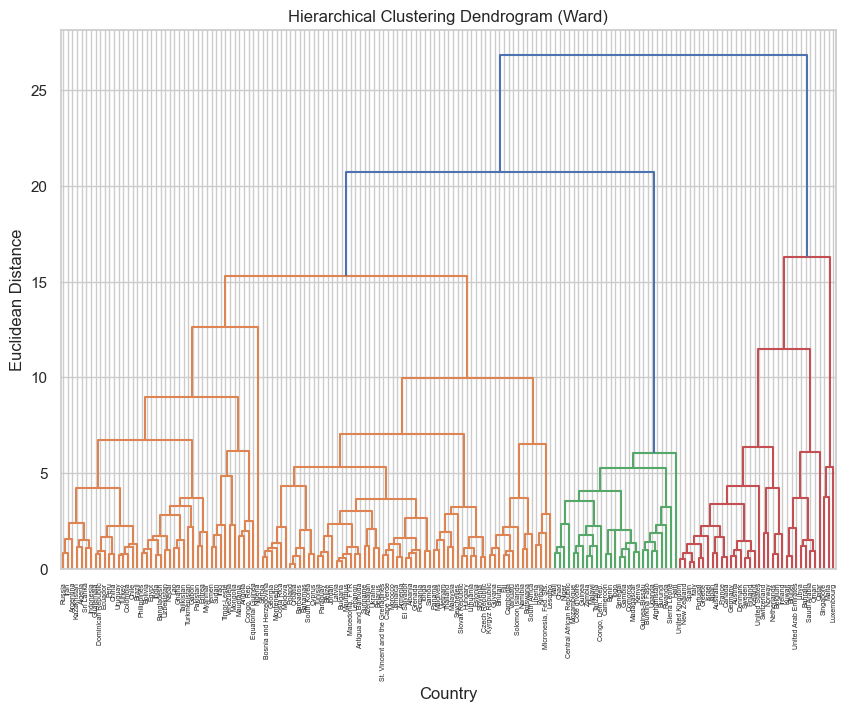

In [58]:
# linkage matrix using the ward method
linked = linkage(scaled_data, 'ward')

# plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=df['country'].values, 
           distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Country')
plt.ylabel('Euclidean Distance')
plt.show()

In [59]:
# hierarchical clustering and assign cluster labels
df['h_cluster'] = fcluster(linked, t=3, criterion='maxclust')
no_country['h_cluster'] = fcluster(linked, t=3, criterion='maxclust')

df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,h_cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3,3
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,3,3
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2,3
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3,3


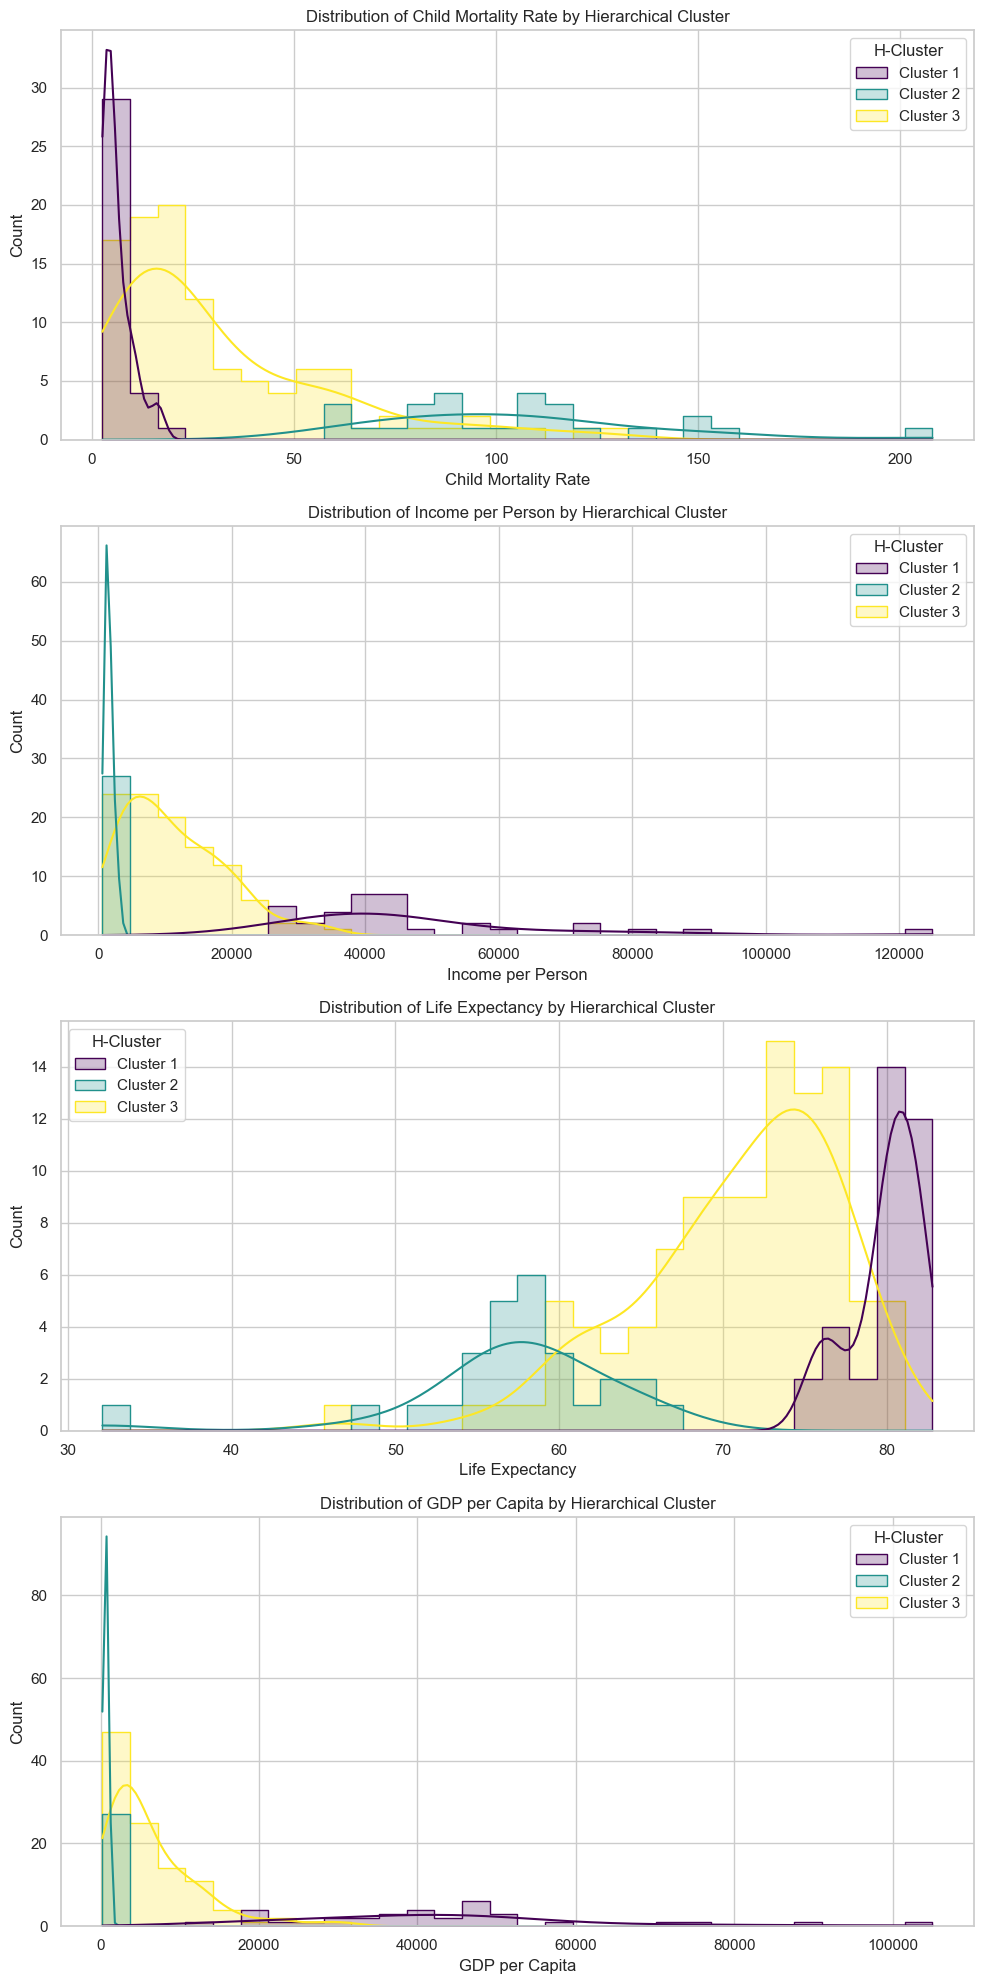

In [60]:
# create subplots for histograms with clusters
fig, axes = plt.subplots(nrows=len(columns_to_visualize), ncols=1, figsize=(10, 20))
# labels for the legend
h_cluster_labels = {1: 'Cluster 1', 2: 'Cluster 2', 3: 'Cluster 3'}
# create visualizations
for i, column in enumerate(columns_to_visualize):
    sns.histplot(data=df, x=column, hue='h_cluster', bins=30, kde=True, ax=axes[i], 
                 palette="viridis", element="step", legend=True)
    axes[i].set_title(f'Distribution of {titles[i]} by Hierarchical Cluster')
    axes[i].set_xlabel(titles[i])
    axes[i].get_legend().set_title('H-Cluster')
    for t, l in zip(axes[i].get_legend().texts, h_cluster_labels.values()):
        t.set_text(l)

# display plots
plt.tight_layout()
plt.show()

In [61]:
no_country.groupby('h_cluster').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
h_cluster,,,,,,,,,,
1,5.961765,58.508824,8.501176,48.902941,47588.235294,4.115500,79.982353,1.888529,43170.588235,1.176471
2,105.070370,23.589630,6.507037,39.662963,1589.740741,7.142778,57.248148,5.433704,667.888889,2.000000
3,31.617925,39.990368,6.353679,48.085527,11341.886792,9.120604,70.921698,2.654623,6407.367925,2.716981


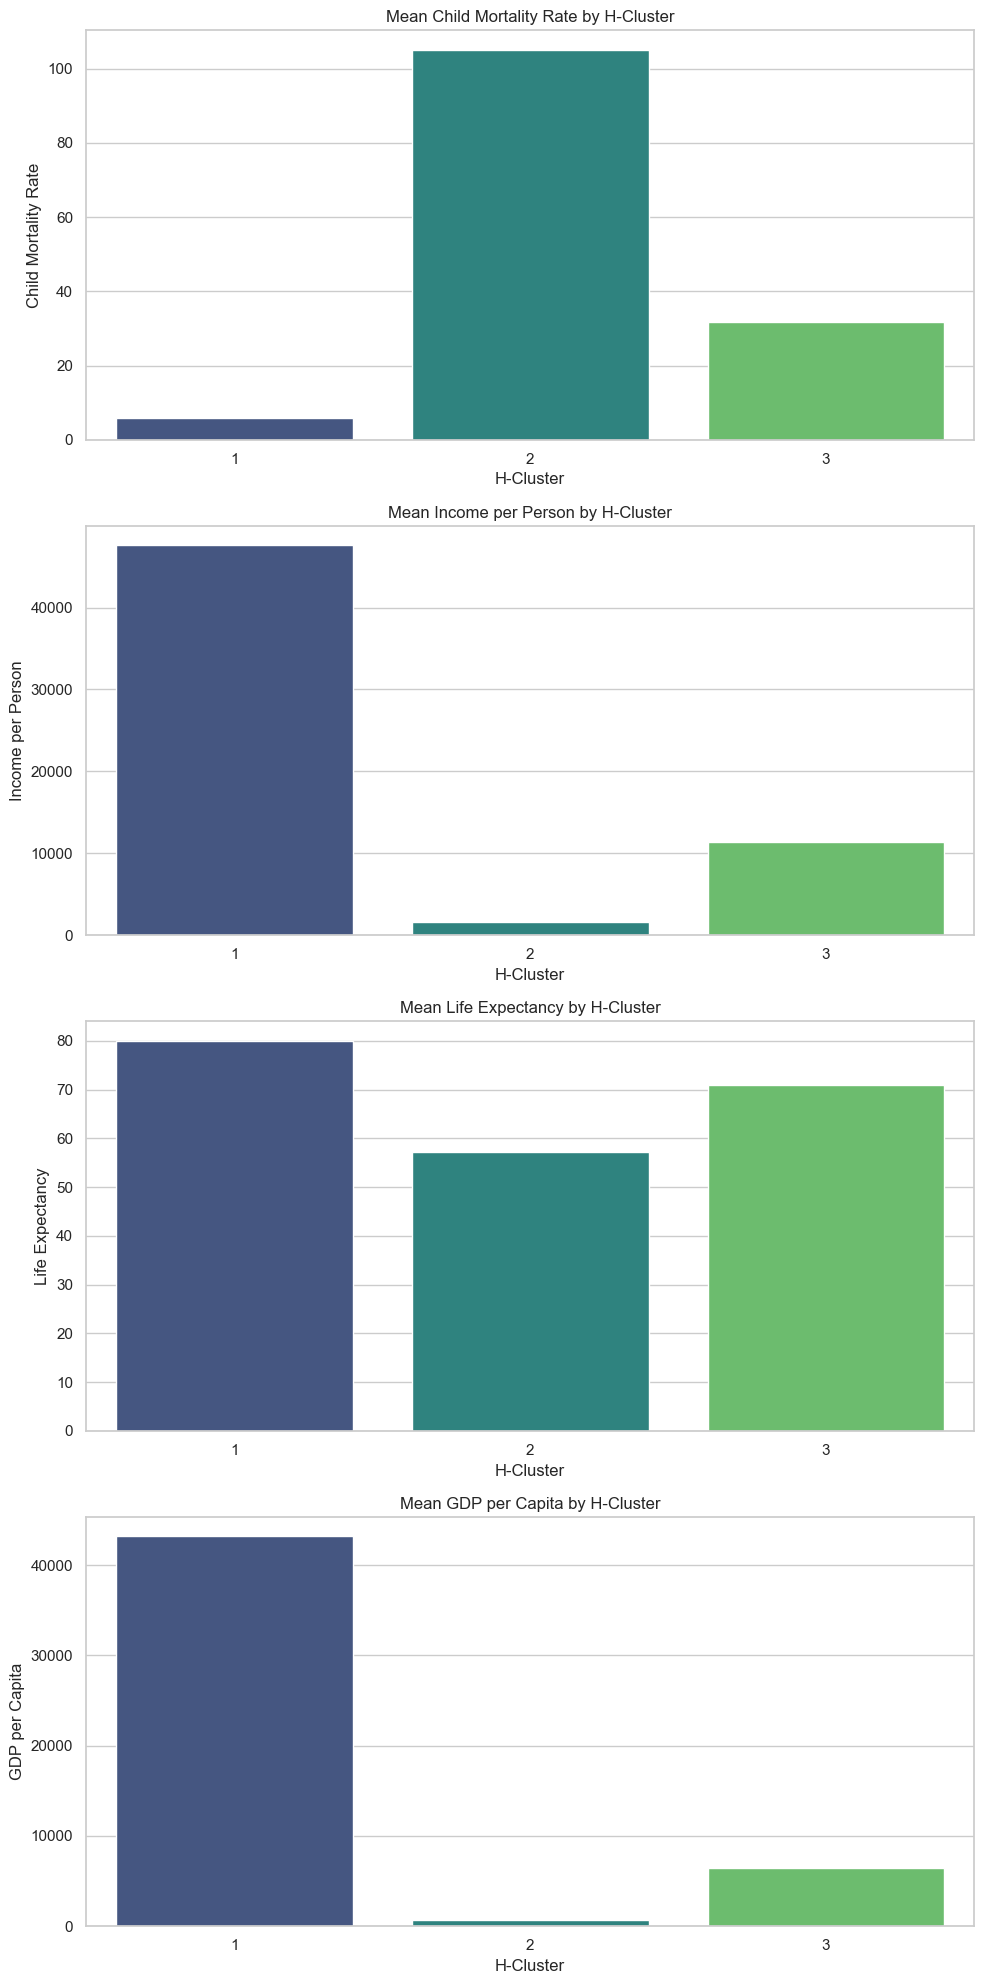

In [62]:
# bar chart sub plots comparing clusters
fig, axes = plt.subplots(nrows=len(columns_to_visualize), ncols=1, figsize=(10, 20))

# loop through the columns to create bar charts
for i, column in enumerate(columns_to_visualize):
    sns.barplot(x='h_cluster', y=column, data=df, ax=axes[i], palette="viridis", ci=None)
    axes[i].set_title(f'Mean {titles[i]} by H-Cluster')
    axes[i].set_xlabel('H-Cluster')
    axes[i].set_ylabel(titles[i])

# display plots
plt.tight_layout()
plt.show()